### Import Libaries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"C:\Users\bbhav\Downloads\Data.xlsx")
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [3]:
df=pd.read_excel(r"C:\Users\bbhav\Downloads\Data.xlsx",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(6), 

###                                                 Data Cleaning

In [5]:
df['salary']=df['salary'].replace('?',np.NaN)

In [6]:
# Number of null values in salary column

df['salary'].isnull().sum()

62

In [7]:
df['salary'].fillna(0,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [9]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [9]:
# Checking null values in entire dataset

df.isna().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

##### Creating Job, education col

In [10]:
df[['job','education']]=df['jobedu'].str.split(',',expand=True)

In [11]:
df.drop('jobedu',axis=1,inplace=True)

In [12]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


##### Creating Month, year col

In [13]:
df[['Month','year']]=df['month'].str.split(',',expand=True)

In [14]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,job,education,Month,year
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,4,47.0,20000.0,1506,married,no,no,yes,no,unknown,...,92 sec,1,-1,0,unknown,no,blue-collar,unknown,may,2017
4,5,33.0,0.0,1,single,no,no,no,no,unknown,...,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017


In [15]:
df.drop('month',axis=1,inplace=True)

In [16]:
df.drop('year',axis=1,inplace=True)

In [17]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,job,education,Month
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,261 sec,1,-1,0,unknown,no,management,tertiary,may
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,151 sec,1,-1,0,unknown,no,technician,secondary,may
2,3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may
3,4,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,92 sec,1,-1,0,unknown,no,blue-collar,unknown,may
4,5,33.0,0.0,1,single,no,no,no,no,unknown,5,198 sec,1,-1,0,unknown,no,unknown,unknown,may


##### Converting min to sec in duration col

In [18]:
# Convert 'duration' column values from minutes to seconds

df['duration']=df['duration'].apply(lambda x:round(float(x.split()[0])*60,2) if 'min' in x else round(float(x.split()[0]),2))

In [19]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,job,education,Month
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,261.0,1,-1,0,unknown,no,management,tertiary,may
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,151.0,1,-1,0,unknown,no,technician,secondary,may
2,3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,76.0,1,-1,0,unknown,no,entrepreneur,secondary,may
3,4,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,92.0,1,-1,0,unknown,no,blue-collar,unknown,may
4,5,33.0,0.0,1,single,no,no,no,no,unknown,5,198.0,1,-1,0,unknown,no,unknown,unknown,may


In [20]:
# Fill missing values in 'age' column with the median age

df['age'].fillna(df['age'].median(),inplace=True)

In [21]:
df['Month'].mode()

0    may
Name: Month, dtype: object

In [22]:
# Fill missing values in 'age' column with the median age
df['Month'].fillna('may',inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
# Checking null values of dataset 
df.isna().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
Month         0
dtype: int64

In [25]:
# typecasting the age column 
df['age']=df['age'].astype('int')

In [26]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,job,education,Month
0,1,58,100000.0,2143,married,yes,no,yes,no,unknown,5,261.0,1,-1,0,unknown,no,management,tertiary,may
1,2,44,60000.0,29,single,yes,no,yes,no,unknown,5,151.0,1,-1,0,unknown,no,technician,secondary,may
2,3,33,120000.0,2,married,yes,no,yes,yes,unknown,5,76.0,1,-1,0,unknown,no,entrepreneur,secondary,may
3,4,47,20000.0,1506,married,no,no,yes,no,unknown,5,92.0,1,-1,0,unknown,no,blue-collar,unknown,may
4,5,33,0.0,1,single,no,no,no,no,unknown,5,198.0,1,-1,0,unknown,no,unknown,unknown,may


In [27]:
# droping customerid column
df.drop('customerid',axis=1,inplace=True)

In [28]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,job,education,Month
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,261.0,1,-1,0,unknown,no,management,tertiary,may
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,151.0,1,-1,0,unknown,no,technician,secondary,may
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,76.0,1,-1,0,unknown,no,entrepreneur,secondary,may
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,92.0,1,-1,0,unknown,no,blue-collar,unknown,may
4,33,0.0,1,single,no,no,no,no,unknown,5,198.0,1,-1,0,unknown,no,unknown,unknown,may


In [29]:
# Use df.info() to get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45181 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45181 non-null  int32  
 1   salary     45181 non-null  float64
 2   balance    45181 non-null  int64  
 3   marital    45181 non-null  object 
 4   targeted   45181 non-null  object 
 5   default    45181 non-null  object 
 6   housing    45181 non-null  object 
 7   loan       45181 non-null  object 
 8   contact    45181 non-null  object 
 9   day        45181 non-null  int64  
 10  duration   45181 non-null  float64
 11  campaign   45181 non-null  int64  
 12  pdays      45181 non-null  int64  
 13  previous   45181 non-null  int64  
 14  poutcome   45181 non-null  object 
 15  response   45181 non-null  object 
 16  job        45181 non-null  object 
 17  education  45181 non-null  object 
 18  Month      45181 non-null  object 
dtypes: float64(2), int32(1), int64(5), object(11)


In [30]:
df.shape

(45181, 19)

In [31]:
# Use df.describe() to get summary statistics for the numerical columns

df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,40.934906,57005.046369,1362.689936,15.807153,258.147717,2.763352,40.198601,0.580355
std,10.616517,32089.163369,3045.584521,8.322919,257.551174,3.096578,100.134050,2.303987
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [32]:
# Find outliers of all numerical columns

def outliers(data):
    for col in df.select_dtypes(include="number"):
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lb=q1-(1.5*iqr)
        ub=q3+(1.5*iqr)
        olr=list(data[(data[col]>=ub)|(data[col]<=lb)][col])
        print(f"Number of outliers in column '{col}': {len(olr)}")
outliers(df)

Number of outliers in column 'age': 487
Number of outliers in column 'salary': 0
Number of outliers in column 'balance': 4730
Number of outliers in column 'day': 0
Number of outliers in column 'duration': 3244
Number of outliers in column 'campaign': 4352
Number of outliers in column 'pdays': 45181
Number of outliers in column 'previous': 45181


In [64]:
# pip install pivottablejs

In [65]:
# from pivottablejs import pivot_ui
# pivot_ui(df)

## Data Visualization

### Univariate

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact,interact_manual

### Find the outliers in each numerical column

In [36]:
df.select_dtypes('number').columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [66]:
@interact_manual
def groupy_(col1=df.select_dtypes('number').columns):
    plt.figure(figsize=(5,3)),sns.boxplot(df[col1]),plt.xlabel(col1),plt.show()
    

interactive(children=(Dropdown(description='col1', options=('age', 'salary', 'balance', 'day', 'duration', 'ca…

#### Observation

* From the above boxplot we can observe that the variables `salary` and `day` does not have any outliers.
* The variables `age`, `balance`, `duration`, `campaign`, `pdays`, `previous` have the outliers because the data is greater than   the upperboundry.

### Understand the probability and frequency distribution of each numerical column

In [38]:
@interact_manual
def groupby_(col1=df.select_dtypes('number').columns):
    plt.figure(figsize=(3,3)),plt.hist(df[col1]),plt.xlabel(col1),plt.show()

interactive(children=(Dropdown(description='col1', options=('age', 'salary', 'balance', 'day', 'duration', 'ca…

### Understand the frequency distribution of each categorical Variable/Column

In [39]:
df.select_dtypes('object').columns

Index(['marital', 'targeted', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'response', 'job', 'education', 'Month'],
      dtype='object')

In [40]:
@interact_manual
def groupby_(col1=df.select_dtypes('object').columns):
    plt.figure(figsize=(3,3)),sns.countplot(x=df[col1]),plt.xlabel(col1),plt.xticks(rotation=90),plt.show()

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

### Bivariate Analysis

### The relationships between numerical columns

In [41]:
@interact_manual
def groupby_(col1=df.select_dtypes('number').columns[1:],
            col2=df.select_dtypes('number').columns[1:]):
    plt.figure(figsize=(3,3))
    sns.scatterplot(x=col1,y=col2,data=df)
    plt.title(col1 and col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('salary', 'balance', 'day', 'duration', 'campaign'…

### Identify the patterns between categorical and numerical columns

In [42]:
@interact_manual
def groupby_(col1=df.select_dtypes('object').columns,
            col2=df.select_dtypes('number').columns[1:]):
    plt.figure(figsize=(3,3)),sns.barplot(x=df[col1],y=df[col2],data=df)
    plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

### 1. Find the correlation between the columns and draw the observations from it.

In [43]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024505,0.097709,-0.008973,-0.004379,0.004814,-0.023817,0.001325
salary,0.024505,1.000000,0.055453,0.027763,-0.009994,0.015113,-0.014946,0.014579
balance,0.097709,0.055453,1.000000,0.004447,0.021591,-0.014507,0.003463,0.016690
day,-0.008973,0.027763,0.004447,1.000000,-0.030313,0.162564,-0.093178,-0.051783
duration,-0.004379,-0.009994,0.021591,-0.030313,1.000000,-0.084420,-0.001710,0.001146
campaign,0.004814,0.015113,-0.014507,0.162564,-0.084420,1.000000,-0.088583,-0.032776
pdays,-0.023817,-0.014946,0.003463,-0.093178,-0.001710,-0.088583,1.000000,0.454735
previous,0.001325,0.014579,0.016690,-0.051783,0.001146,-0.032776,0.454735,1.000000


### 2. What is the mean age and duration time of the customers with respect to every column?

In [44]:
## METHOD 1

In [44]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'job', 'education', 'Month'],
      dtype='object')

In [45]:
l=list(df.columns)
l
for i in l:
    if i==l[0]:
        l.remove(i)
    else:
        pass
for i in l:
    if i==l[9]:
        l.remove(i)
    else:
        pass

In [46]:
@interact
def groupby_(col1=l,
             col2=['age','duration']):
    return df.groupby(col1)[col2].mean()

interactive(children=(Dropdown(description='col1', options=('salary', 'balance', 'marital', 'targeted', 'defau…

In [48]:
## METHOD 2

In [47]:
pd.pivot_table(df,aggfunc='mean',index=['age','duration'],margins_name='All').head()

balance  campaign   day  pdays  previous  salary
age duration                                                  
18  92.0        108.0       1.0   9.0  183.0       1.0  4000.0
    104.0        35.0       2.0  21.0   -1.0       0.0  4000.0
    122.0      1944.0       3.0  10.0   -1.0       0.0  4000.0
    130.0         3.0       2.0  25.0   -1.0       0.0  4000.0
    143.0         5.0       2.0  24.0   -1.0       0.0  4000.0

In [50]:
## METHOD 3

In [48]:
df.groupby(["age","duration"]).mean()

salary  balance   day  campaign  pdays  previous
age duration                                                   
18  92.0       4000.0    108.0   9.0       1.0  183.0       1.0
    104.0      4000.0     35.0  21.0       2.0   -1.0       0.0
    122.0      4000.0   1944.0  10.0       3.0   -1.0       0.0
    130.0      4000.0      3.0  25.0       2.0   -1.0       0.0
    143.0      4000.0      5.0  24.0       2.0   -1.0       0.0
...               ...      ...   ...       ...    ...       ...
93  476.0     55000.0    775.0   4.0       2.0   13.0       9.0
    860.0     55000.0    775.0  22.0       2.0  177.0       7.0
94  212.0     55000.0   1234.0   3.0       1.0   -1.0       0.0
95  207.0     55000.0   2282.0  21.0      17.0   -1.0       0.0
    215.0     55000.0      0.0   1.0       1.0   -1.0       0.0

[19817 rows x 6 columns]

In [49]:
pd.pivot_table(df,aggfunc='mean',index='duration',margins_name='All')

,age,balance,campaign,day,pdays,previous,salary
duration,,,,,,,
0.0,39.666667,2016.000000,7.000000,21.333333,-1.000000,0.000000,93333.333333
1.0,33.500000,9518.000000,1.000000,8.000000,126.500000,2.000000,55000.000000
2.0,46.666667,711.666667,1.666667,9.333333,-1.000000,0.000000,29333.333333
3.0,34.000000,83.750000,2.250000,18.750000,-1.000000,0.000000,55000.000000
4.0,32.266667,231.933333,2.600000,16.533333,75.933333,0.266667,58000.000000
...,...,...,...,...,...,...,...
3366.0,45.000000,66.000000,3.000000,13.000000,-1.000000,0.000000,20000.000000
3422.0,37.000000,359.000000,2.000000,7.000000,-1.000000,0.000000,20000.000000
3785.0,45.000000,955.000000,1.000000,27.000000,-1.000000,0.000000,70000.000000


### 3. Find the mean and median of every column response wise and draw the observations.

In [53]:
#a=[]
#l=list(df.columns)
#l
#l.pop(2)
#for i in l:
#   if i==l[-4]:
#      l.remove(i)
#     a.append(l)
    

In [54]:
#@interact
#def groupby_(col1='response',
 #           col2=l):
  #  return round(df.groupby(col1)[col2].agg({'mean','median'},margins=True),2)

In [55]:
## METHOD 1

In [50]:
@interact
def groupby_(col1='response',
            col2=df.select_dtypes('number').columns):
    return round(df.groupby(col1)[col2].agg({'mean','median'}),2)

interactive(children=(Text(value='response', description='col1'), Dropdown(description='col2', options=('age',…

In [57]:
## METHOD 2

In [51]:
pd.pivot_table(df,aggfunc='mean',index='response',margins_name='All')

,age,balance,campaign,day,duration,pdays,previous,salary
response,,,,,,,,
no,40.837996,1304.094525,2.845841,15.892916,221.144633,36.417531,0.502106,56770.917933
yes,41.666162,1804.832041,2.140912,15.160015,537.361074,68.729336,1.170796,58771.704180


In [52]:
pd.pivot_table(df,aggfunc='median',index='response',margins_name='All')

,age,balance,campaign,day,duration,pdays,previous,salary
response,,,,,,,,
no,39,417,2,16,164.0,-1,0,60000.0
yes,38,733,2,15,426.0,-1,0,60000.0


In [60]:
## METHOD 3

In [53]:
df.groupby('response').median().T

response,no,yes
age,39.0,38.0
salary,60000.0,60000.0
balance,417.0,733.0
day,16.0,15.0
duration,164.0,426.0
campaign,2.0,2.0
pdays,-1.0,-1.0
previous,0.0,0.0


In [54]:
df.groupby('response').mean().T

response,no,yes
age,40.837996,41.666162
salary,56770.917933,58771.704180
balance,1304.094525,1804.832041
day,15.892916,15.160015
duration,221.144633,537.361074
campaign,2.845841,2.140912
pdays,36.417531,68.729336
previous,0.502106,1.170796


### 4. Find the probabilities with respect to the job role and education with customer responses.

In [55]:
@interact
def groupby_(col1=['job','education'],
            col2='response'):
    return (df.groupby(col1)[col2].value_counts())/len(df)

interactive(children=(Dropdown(description='col1', options=('job', 'education'), value='job'), Text(value='res…

### 5. Find the Best features using correlation and Chi-square test.

In [56]:
from scipy import stats

def chisquare(col1, col2):
    stat,p_val,dof,expected = stats.chi2_contingency(pd.crosstab(df[col1],df[col2]))
    if p_val <= 0.05:
        return 'Reject Ho: {} and {} are dependent (p-value: {:.4f})'.format(col1,col2, p_val)
    else:
        return 'Failed to Reject Ho: {} and {} are independent (p-value: {:.4f})'.format(col1,col2, p_val)
        
col1_dropdown= df.columns
col2_dropdown= df.columns

@interact_manual(col1=col1_dropdown, col2=col2_dropdown)
def run_chisquare(col1, col2):                                                                                                  
    if col1 != col2:
        result = chisquare(col1, col2)
        print(result)
    else:
        print("Please select different columns for comparison.")


interactive(children=(Dropdown(description='col1', options=('age', 'salary', 'balance', 'marital', 'targeted',…

### 6.Find the relation of salary and age column using statistical tests and draw the observations from it.

In [57]:
# covariance of age, salary 
cov=sum((df['age']-df['age'].mean())*(df['salary']-df['salary'].mean()))/len(df)

In [58]:
corr=cov/(df['age'].std()*df['salary'].std())
corr

0.024504792045494304

<AxesSubplot:>

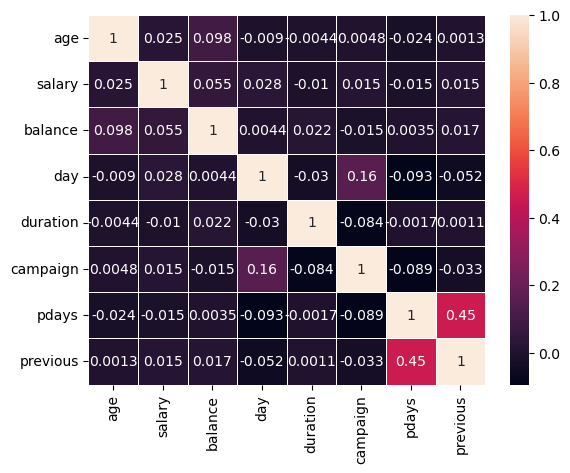

In [59]:
sns.heatmap(df.corr(),annot=True,linewidth=.5)

### 7. Using statistical analysis, find whether the age column is impacting the duration column or not.

In [60]:
k=df[['age','duration']].describe().T
k

,count,mean,std,min,25%,50%,75%,max
age,45181.0,40.934906,10.616517,18.0,33.0,39.0,48.0,95.0
duration,45181.0,258.147717,257.551174,0.0,103.0,180.0,319.0,4918.0


### 8. Show that the columns are following the Normal Distribution or not, if not following try to convert it non-normal to normal. (use transformation techniques)


In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
from scipy.stats import boxcox, probplot
from ipywidgets import interact_manual

def check_normality(data, columns):
    """
    Check whether the specified columns in a pandas dataframe follow a normal distribution,
    and apply Box-Cox transformation to non-normal columns to make them more normally distributed.
    
    """
    
    # iterate over the specified columns
    for column in columns:
        # extract the column of interest
        col = data[column]
        
        # plot a histogram to visualize the distribution
        plt.hist(col, bins=20)
        plt.title(column)
        plt.show()

        # create a probability plot (Q-Q plot) to compare to a normal distribution
        probplot(col, dist='norm', plot=plt)
        plt.title(column)
        plt.show()

        # try performing a Box-Cox transformation on the column
        try:
            transformed, _ = boxcox(col)
            # plot the histogram of the transformed data
            plt.hist(transformed, bins=20)
            plt.title(f'Transformed {column}')
            plt.show()

            # plot a probability plot of the transformed data
            probplot(transformed, dist='norm', plot=plt)
            plt.title(f'Transformed {column}')
            plt.show()

        # handle the case where the data is non-positive
        except ValueError:
            print(f'{column} column cannot be transformed due to non-positive data')

# load data into a pandas dataframe
df
@interact_manual(columns=df.select_dtypes(include=np.number).columns.tolist())
def test_normality(columns):
    # split the comma-separated string of column names into a list
    columns_list = [col.strip() for col in columns.split(',')]

    # check normality and perform Box-Cox transformation
    check_normality(df, columns_list)

interactive(children=(Dropdown(description='columns', options=('age', 'salary', 'balance', 'day', 'duration', …